<a href="https://colab.research.google.com/github/ZarevichMikhail/DM-manual/blob/main/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D0%B8%D1%87%D0%BA%D0%B0_%D0%BF%D0%BE_%D0%94%D0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение

Пока не готово. Нужно добавить сюда введение и список литературы.

Литература и видео, которые показались мне интересными.

1.   Жигалова Е.Ф. Дискретная математика. / Е.Ф. Жигалова. – Томск: Эль Контент, 2014. – 98 с. Наш основной учебник

Ещё несколько интересных учебников.
2. Хаггарти Р. Дискретная математика. Это более простой и понятный учебник. Его можно использовать для первоначального знакомства ДМ.
3. Новиков Ф.А. Дискретная математика для программистов. Это уже более фундаментальный учебник.
4. Кормен. Агоритмы, построение и анализ.
4. https://www.geeksforgeeks.org/dsa/graph-types-and-applications/ - информация про графы на английском языке
5. https://www.youtube.com/playlist?list=PLcsjsqLLSfNAY-pm5c4XZQhSl1U_20itT - Лекции по дм из МГУ
6.



# Лабораторная работа №1 Генерация графа

## Цель работы


В 1 лабораторной работе требуется написать программу, которая создаёт матрицу смежности и матрицу инцидентности графа заданного типа, затем выводит рисунок графа.

Формат ввода: тип графа, количество вершин.


Формат вывода: матрица смежности и матрица инцидентности графа, рисунок графа.

## Теория

Формально, граф G — это упорядоченная пара $$G=(V,E)$$, где:

*   V — множество вершин графа.
*   E — множество рёбер. Рёбра представляют собой пары вершин из V.

Две вершины называются **смежными**, если они соединены ребром, а соответствующее ребро **инцидентно** своим вершинам.

Графы можно классифицировать по различным свойствам, что позволяет выбрать наиболее подходящую модель для конкретной задачи.



*   Неориентированные и ориентированные графы (Undirected and Directed Graphs)
  *   Неориентированный граф: Ребра не имеют направления. Если существует ребро между A и B, то по нему можно перемещаться в обе стороны.
  *   Ориентированный граф (орграф): Каждое ребро (в этом случае его часто называют дугой) имеет направление от одной вершины к другой. Если есть дуга из A в B, это не означает наличие дуги из B в A.


*  Взвешенные и невзвешенные графы (Weighted and Unweighted Graphs)
  *   Невзвешенный граф: Все ребра считаются равнозначными.
  *   Взвешенный граф: Каждому ребру присваивается числовое значение, называемое весом. Вес может представлять расстояние, стоимость, время, пропускную способность или любую другую характеристику связи




*   Простые графы, мультиграфы и псевдографы
  *   Простой граф: Граф, в котором между любой парой вершин существует не более одного ребра, и отсутствуют петли(ребра, соединяющие вершину саму с собой).
  *   Мультиграф: Граф, в котором допускаются кратные (параллельные) ребра — несколько ребер, соединяющих одну и ту же пару вершин.
  *   Псевдограф: Мультиграф, в котором также допускаются петли.


*   Новый пункт






В памяти компьютера граф можно представить разными способами. Рассмотрим 2 из них: матрицу смежности и матрицу инцидентности.


Строки и столбцы в матрице смежности обозначают вершины графа. Заполняется матрица следующим образом.



$$M_{ij} =
\begin{cases}
n, & \text{если } x_i \text{ соединена с вершиной } x_j \text{ n рёбрами} \\
0, & \text{если вершины } x_i \text{и } x_j  \text{ не смежны }
\end{cases}$$

Также значение n может быть весом ребра.


Строки в матрице инцидентности обозначают вершины графа, а столбцы – рёбра.

$$B_{i,j}=
\begin{cases}
1, & \text{если ребро } u_j \text{ инцидентно вершине } x_i \\
2, & \text{если ребро } u_j \text{ - петля в вершине } x_i \\
0, & \text{если ребро } u_j \text{ не инцидентно вершине } x_i.
\end{cases}$$

Пример.


Граф. На рёбрах обозначены их номера для сопоставления с матрицей инцидентности.


![](https://raw.githubusercontent.com/ZarevichMikhail/DM-manual/refs/heads/main/Рис%201.1%20Пример%20графа.png)



```
Матрица смежности
[1, 1, 0, 0, 0]
[1, 0, 1, 1, 1]
[0, 1, 0, 0, 1]
[0, 1, 0, 0, 0]
[0, 1, 1, 0, 0]
Матрица инцидентности
[2, 1, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 0]
[0, 0, 1, 0, 0, 1]
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 1]

```





Networkx работает с графами, заданными матрицeй смежности.


## Рекомендации по выполнению работы

### Структура программы и оформление кода.

Программа должна иметь следующую структуру.

In [ ]:
import numpy as np  # Библиотека для работы с матрицами
import matplotlib.pyplot as plt # Визуализация графов
import networkx as nx # Библиотека для работы с графами
import random
import math
from enum import Enum # библиотека для создания перечислений


# Перечисление, содержащее типы графов
class GraphTypeEnum(Enum): …

# Создание матрицы смежности
def CreateMs(nodes, type): …

# Создание матрицы инцидентности
def CreateMi(ms, nodes): …

# Вывод матриц
def MatrixOutput(mi, ms): …

# Вывод графа
def DrawGraph(ms): …

# Вывод графа с кратными рёбрами
def DrawMultiGraph(ms)
  pass


def main():
    print("""Для использования полного графа введите 1.
    Для использования обыкновенного графа введите 2.
    Для использования графа с петлями введите 3.
    Для использования графа с кратными петлями и рёбра-ми введите 4.""")
    GraphType = GraphTypeEnum(int(input("Тип графа: ")))
    NodesNumber = int(input("Введите количество рёбер: "))

    ms = CreateMs(NodesNumber, GraphType)  # Создание матрицы смежности
    mi = CreateMi(ms, NodesNumber)          # Создание матрицы инцидентности

    MatrixOutput(ms, mi)        # Вывод матриц в консоль

    if GraphType != GraphTypeEnum.Multigraph:
        DrawGraph(ms)               # Рисует граф
    else:
        DrawMultiGraph(ms)          # Рисует граф с кратными рёбрами


if __name__ == "__main__":
    main()


Поскольку программа довольно простая, не содержит других классов и целиком находится в одном файле, функцию `main()` можно не добавлять.


К каждой функции должны быть добавлены комментарии
```
# Создание матрицы смежности
def CreateMs(nodes, graph_type):
    """
    Получает на вход количество вершин и тип графа, возвращает матрицу смежности графа

    Параметры
    ----------
    nodes: Количество вершин.
    type: Тип графа.

    Возвращает
    ----------
    ms: Матрица смежности.

    См. также
    ----------
    Тут должна быть информация о каких-нибудь похожих функциях.

    Примеры
    --------
    Примеры использования функции, конструктора класса и т.д.

    """

```



Благодаря такому оформлению, этот комментарий можно будет увидеть в точке вызова функции. Это значительно упрощает разработку, так как не нужно при использовании каждой функции возвращаться документации.

### Работа с перечислениями

Лекция Горяинова про перечисления: тут будет ссылка

### Вывод графа на экран

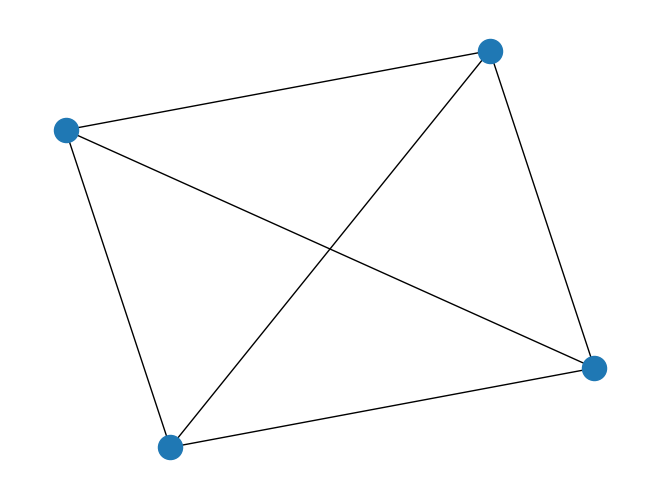

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# матрица смежности. Должна быть получена в результате выполнения функции, например:
# ms = CreateMs(nodes, type)
# Матрица инцидентности, которая создаётся на основе матрицы смежности
# mi = CreateMi(ms)

# Пример полученной матрицы
ms = [[0, 1, 1, 1],
      [1, 0, 1, 1],
      [1, 1, 0, 1],
      [1, 1, 1, 0]]


# Эта часть кода должна быть в функции DrawGraph
G = nx.Graph(np.array(ms))	# Создание графа
nx.draw(G) 					# Отрисовка графа
plt.show() 					# Вывод на экран


alpha	- float or None (default=None) -	Прозрачность вершин и рёбер. Принимает значения от 0 до 1.

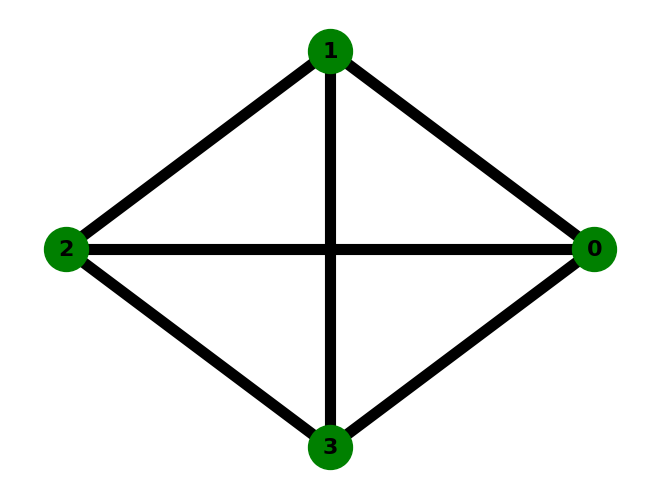

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

ms = [[0, 1, 1, 1],
      [1, 0, 1, 1],
      [1, 1, 0, 1],
      [1, 1, 1, 0]]

G = nx.Graph(np.array(ms))
pos = nx.circular_layout(G)

nx.draw(G, pos, node_size = 1000, width = 8, font_size = 16, with_labels = True, font_weight = 'bold', node_color = "green")

plt.show()


# Лабораторная работа №2 Метрики графа

## Теория

Для определения маршрутов длины $q$ в графе $G = (X,U)$ его матрицу смежности $R$ возводят в степень, равную $q$. Тогда для каждого значения степени $q = 1,2,...,k$ значение элемента $(r_{ij})_q$ матрицы $R_q$ определяет количество маршрутов $\mu_{ij}$ длиной, равной значению степени $q$.

---
Алгоритм заполнения матрицы метрики.

Шаг 1. Задаём матрицу метрики $M=(m_{ij})_{n \times n}$. Размерность матрицы $M$ равна размерности матрицы $R$. Все элементы $m_{ij}$ матрицы $M$ не определены.

Шаг 2. Начальное значение степени $k$ матрицы $S$ равно $\langle 1 \rangle$: $k = 1$. $\forall m_{ij}$ присваиваем значение «0», на основании 1-ой аксиомы Фрише.

Шаг 3. Всем элементам $m_{ij}$, значения которых не определены, присвоить значение степени $k$, если соответствующие им элементы матрицы $S^k \neq 0$. (Значения элементов $m_{ij}$ определяются только один раз.)

Шаг 4. Повышаем степень $k$ матрицы $S$: $k = k+1$.

Шаг 5. Проверяем, является ли матрица $S^{k-1}$ устойчивой.
Если матрица $S^{k-1}$ --- неустойчива, то переходим к шагу 3.
Иначе --- переходим к шагу 6.

Шаг 6. Всем элементам $m_{ij}$ матрицы $M$, значения которых остались неопределёнными, присваиваем значение $\infty$ (бесконечность).

Шаг 7. Матрица метрики $M = (m_{ij})$ построена.

Конец алгоритма.

Примечание: Элементам $\{m_{ij}\}$ значения присваиваются только один раз. Следовательно, если значение элемента $m_{ij}$ уже определено, то оно больше не меняется.

Радиус графа определяется по матрице метрики следующим способом: в каждой строке матрицы $M$ выделяется значение максимального элемента.
Наименьшее из выделенных значений --- есть величина радиуса графа.

Диаметр графа также определяется по матрице метрики $M$ следующим способом: в каждой строке матрицы $M$ выделяется значение максимального элемента.
Наибольшее из выделенных значений --- есть величина диаметра графа.

\

# Лабораторная работа №3 Раскраска графа

## Теория

Алгоритм Магу-Вейсмана для нахождения пустых подграфов.

1.   Построить скелет графа.
2.   Построить матрицу инцидентности графа.
3. Ввести систему логических переменных $x_1, x_2, . . ., x_i, . . ., x_n$, подчинив её условиям, вытекающим из законов булевой алгебры:$x^2_i = x_i, x_i + 1 = 1$
4. Составяем произведение $$P_G = \prod_{j=1}^{m} \sum_{i=1}^{n} a_{ij} x_i$$
где $a_{ij}$ – элемент матрицы инцидентности графа $G$.

5. Приводим его к дизъюнктивной нормальной форме.
В результате выполненных преобразований выражение $P_G$ будет иметь минимальную форму и представлять выражение суммы произведений переменных из множества вершин $x_1, x_2, . . ., x_i, . . ., x_n$, т. е. многочлен.

6. Для каждого слагаемого многочлена P_G выделить переменные, которые в него не входят, но входят в множество всех вершин графа. Эти переменные порождают максимальные пустые подграфы данного графа G, так как соответствующие им вершины в графе G образуют максимальные пустые подграфы.


## Пример.
Найти раскраску вершин графа.

```
ms =
[[0, 1, 1, 1, 0, 1, 1],
[1, 0, 1, 1, 1, 0, 1],
[1, 1, 0, 1, 1, 1, 0],
[1, 1, 1, 0, 0, 1, 0],
[0, 1, 1, 0, 0, 0, 1],
[1, 0, 1, 1, 0, 0, 0],
[1, 1, 0, 0, 1, 0, 0]]

```
![](https://raw.githubusercontent.com/ZarevichMikhail/DM-manual/refs/heads/main/Рис%203.1%20Граф%2C%20который%20надо%20раскрасить.png)




1. Составляем произведение и приводим его к ДНФ.
$$P_G = (x1+x2)*(x1+x3)*(x1+x4)*(x1+x6)*(x1+x7)*(x2+x3)*(x2+x4)*(x2+x5)*(x2+x7)* (x3+x4)*(x3+x5)*(x3+x6)*(x4+x6)*(x5+x7) = x1*x2*x3*x4*x5 + x1*x2*x3*x4*x7 + x1*x2*x3*x5*x6 + x1*x2*x3*x6*x7 + x1*x2*x4*x5*x6 + x1*x3*x4*x5*x7 + x2*x3*x4*x6*x7 $$

2. Для каждого слагаемого преобразованного выражения запишем те элементы, которых не хватает до полного множества вершин, получим множество вершин пустых подграфов. Обозначим его за $S$.
$$S = ((6, 7), (5, 6), (4, 7), (4, 5), (3, 7), (2, 6), (1, 5))$$

3. Все множества уже имеют одинаковую мощность, поэтому упорядочим их тут только по убыванию суммы степеней.

$$S = ((1, 5), (2, 6), (3, 7), (4, 7), (4, 5), (6, 7), (5, 6))$$

4. Присвоим вершинам **1 и 5** красный цвет, уберём это множество из множества вершин, также уберём их оставшихся множеств вершины 1 и 5.
Новое множество S
$$S = ((2, 6), (3, 7), (4, 7), (4), (6, 7), (6))$$

5. Вершинам **2 и 6** присвоим зелёный цвет и проделаем то же самое.
$$S = ((3, 7), (4, 7), (4), (7))$$

6. Аналогичным образом действуем с вершинами **3 и 7**, присваивая им оранжевый цвет. У нас останется только вершина **4**, которую окрасим синим, после чего множество станет пустым.

![](https://raw.githubusercontent.com/ZarevichMikhail/DM-manual/refs/heads/main/Рис%203.2%20Раскрашенный%20граф.png)




### Пример раскраски графа

[[3, 4, 6], [2, 5], [1]]


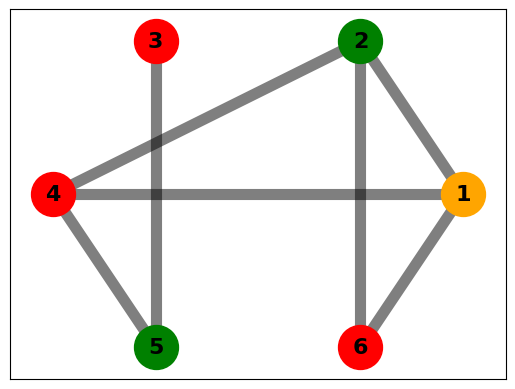

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math

# функция для поиска суммы степеней множества вершин
def SearchVertexPower(list):
    """Получает на вход подмножество вершин в виде списка, возвращает число - сумму степеней вершин

    Parameters
    ---
    list:
        Подмножество вершин в виде списка
    """
    NodesNumber = len(ms[0])
    PowerSum = 0
    for i in list: # i - текущая строка
        for j in range(NodesNumber):
            PowerSum += ms [int(i) - 1] [j] # i-1 - текущая строка
    return PowerSum

ms = [[0, 1, 0, 1, 0, 1],
      [1, 0, 0, 1, 0, 1],
      [0, 0, 0, 0, 1, 0],
      [1, 1, 0, 0, 1, 0],
      [0, 0, 1, 1, 0, 0],
      [1, 1, 0, 0, 0, 0]]


# Список с вершинами, которым нужно присвоить один цвет
# будет получен в результате алгоритма Магу-Вейсмана
SameColorNodes = [[1], [3, 4, 6], [2, 5]] # будет получен в результате алгоритма Магу-Вейсмана
SameColorNodes = sorted(SameColorNodes, reverse = True, key=lambda x: (len(x), SearchVertexPower(x)))  # сортировка сначала по первому параметру, потом по второму
print(SameColorNodes)

colors = ["red", "green", "orange", "blue", "yellow", "violet", "purple", "pink", "grey", "magenta"]

G = nx.Graph(np.array(ms))
pos = nx.circular_layout(G)

labels = {}
for i in G.nodes():
    labels[i]= i+1

for i in range(len(SameColorNodes)):
    for j in range(len(SameColorNodes[i])):
        SameColorNodes[i][j] = SameColorNodes[i][j]-1

for i in range(len(SameColorNodes)):
    nx.draw_networkx_nodes(SameColorNodes[i], pos, node_color=colors[i], node_size=1000)

nx.draw_networkx_edges(G, pos, width = 8, alpha = 0.5)
nx.draw_networkx_labels(G, pos, labels, font_size=16, font_weight = 'bold')
plt.show()


# Лабораторная работа №4 Алгоритм Дейкстры.

{(0, 1): 1, (0, 3): 2, (1, 2): 1, (1, 3): 6, (1, 4): 2}


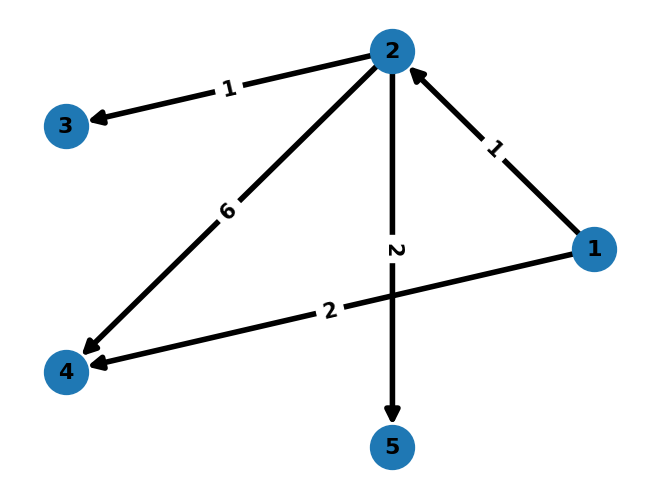

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math

ms = [[0, 1, 0, 1, 0],
      [0, 0, 1, 1, 1],
      [0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0]]

nodes = 5
mv = []
for i in range(nodes):
    mv.append([math.inf] * nodes)

weights = dict()
for i in range(nodes):
    for j in range(i, nodes):
        if ms[i][j]!= 0:
              mv[i][j] = random.randint(1,10)
              tuple = i, j
              weights[tuple] = mv[i][j]

print(weights)
G = nx.DiGraph(np.matrix(ms))

pos = nx.circular_layout(G)

labels = {}
for i in G.nodes():
    labels[i]= i+1

nx.draw(G,pos, font_weight = 'bold', node_size = 1000, width = 4,arrowsize = 20, arrowstyle = "-|>")
nx.draw_networkx_labels(G, pos, labels, font_size=16, font_weight = 'bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels = weights, font_size=15, font_weight = 'bold')

plt.show()
